Ingestão e Exploração dos Dados

Configuração Inicial

In [1]:
# Célula 1: Imports e Configurações
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Configurações visuais
sns.set_theme(style="whitegrid", palette="husl")
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 11

print("✅ Bibliotecas importadas com sucesso!")

✅ Bibliotecas importadas com sucesso!


Carregamento dos Dados

In [3]:
# Célula 2: Carregamento dos JSONs
df_accounts = pd.read_json('../data/raw/accounts_anonymized.json')
df_cases = pd.read_json('../data/raw/support_cases_anonymized.json')

# Converter colunas de data imediatamente (JSON carrega datas como strings)
# Isso facilita o trabalho com SQL mais tarde
df_accounts['account_created_date'] = pd.to_datetime(df_accounts['account_created_date'])
df_cases['case_created_date'] = pd.to_datetime(df_cases['case_created_date'])
df_cases['case_closed_date'] = pd.to_datetime(df_cases['case_closed_date'])

print(f"📊 Accounts carregados: {len(df_accounts)} registros")
print(f"📊 Cases carregados: {len(df_cases)} registros")

📊 Accounts carregados: 1415 registros
📊 Cases carregados: 10000 registros


Análise Exploratória Detalhada

In [5]:
# Célula 3: Estrutura e Qualidade - Accounts
print("=" * 80)
print("ANÁLISE: ACCOUNTS")
print("=" * 80)

print("\n📋 Informações Gerais:")
print(df_accounts.info())

print("\n📊 Resumo Categórico (Top valores):")
cols_cat = ['account_country', 'account_industry']
display(df_accounts[cols_cat].describe())

print("\n📅 Resumo Temporal:")
print(f"Primeira conta criada em: {df_accounts['account_created_date'].min()}")
print(f"Última conta criada em:   {df_accounts['account_created_date'].max()}")
print(f"Período total de dados:   {df_accounts['account_created_date'].max() - df_accounts['account_created_date'].min()}")

print("\n🔍 Primeiras 5 linhas:")
display(df_accounts.head())

print("\n⚠️ Valores Nulos:")
print(df_accounts.isnull().sum())

print("\n🔑 Colunas disponíveis:")
print(df_accounts.columns.tolist())

ANÁLISE: ACCOUNTS

📋 Informações Gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1415 entries, 0 to 1414
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   account_sfid          1415 non-null   object        
 1   account_name          1415 non-null   object        
 2   account_created_date  1415 non-null   datetime64[ns]
 3   account_country       1408 non-null   object        
 4   account_industry      1402 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 55.4+ KB
None

📊 Resumo Categórico (Top valores):


,account_country,account_industry
count,1408,1402
unique,72,22
top,United States,Pharmaceuticals
freq,553,421



📅 Resumo Temporal:
Primeira conta criada em: 2007-11-19 21:27:02
Última conta criada em:   2025-01-06 10:46:57
Período total de dados:   6257 days 13:19:55

🔍 Primeiras 5 linhas:


,account_sfid,account_name,account_created_date,account_country,account_industry
0,28cb93e07db33a85d12c75825a11ab6a97c5a0df9750f6...,Customer_b9c711e0,2017-12-18 15:53:15,Pakistan,Printing
1,17779701277914218bcfcd9211c3fb6673758ca2f6e014...,Customer_b3e69ecd,2010-01-11 17:41:46,United Kingdom,Household & Personal Products
2,777c8f6154d9e1c1563ce0a62dbd8392ef3204cec6ecd1...,Customer_3b6e1b44,2020-10-19 17:12:22,China,Packaging and Containers
3,e7b6a33c931f01e1e2d42b47318945216da6fef294a738...,Customer_58de6751,2019-03-20 12:56:09,South Korea,Pharmaceuticals
4,fbcec0b147243cfce96df94fe543968c04cfc0a4a29fd7...,Customer_97f3101d,2021-03-24 14:06:24,Poland,Printing



⚠️ Valores Nulos:
account_sfid             0
account_name             0
account_created_date     0
account_country          7
account_industry        13
dtype: int64

🔑 Colunas disponíveis:
['account_sfid', 'account_name', 'account_created_date', 'account_country', 'account_industry']


In [10]:
# Célula 4: Estrutura e Qualidade - Cases
print("=" * 80)
print("ANÁLISE: SUPPORT CASES")
print("=" * 80)

print("\n📋 Informações Gerais:")
print(df_cases.info())

cols_negocio = ['case_status', 'case_priority', 'case_severity', 'case_product']

print("\n📊 Distribuição de Métricas Chave (Top 5):")
for col in cols_negocio:
    print(f"\n--- {col.upper()} ---")
    # Mostra contagem e % relativa lado a lado
    dist = pd.concat([df_cases[col].value_counts(), 
                      df_cases[col].value_counts(normalize=True).mul(100).round(1)], 
                     axis=1, keys=['Qtd', '%'])
    display(dist)

print("\n📅 Resumo Temporal dos Casos:")
print(f"Primeiro caso: {df_cases['case_created_date'].min()}")
print(f"Último caso:   {df_cases['case_created_date'].max()}")

print("\n⚠️ Valores Nulos (Importante para identificar casos abertos):")
print(df_cases.isnull().sum())

ANÁLISE: SUPPORT CASES

📋 Informações Gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   case_sfid          10000 non-null  object        
 1   account_sfid       8407 non-null   object        
 2   case_number        10000 non-null  int64         
 3   case_contact_name  10000 non-null  object        
 4   case_product       10000 non-null  object        
 5   case_status        10000 non-null  object        
 6   case_resolution    10000 non-null  object        
 7   case_details       10000 non-null  object        
 8   case_closure       10000 non-null  object        
 9   case_priority      10000 non-null  object        
 10  case_severity      10000 non-null  object        
 11  case_reason        10000 non-null  object        
 12  case_type          10000 non-null  object        
 13  case_category   

,Qtd,%
case_status,,
Closed,7043,70.4
Duplicate,2015,20.2
New,795,8.0
Waiting On Customer,45,0.4
Working,39,0.4
Sent_To_Dev,35,0.4
Waiting for 3rd Party,10,0.1
Remote Session Scheduled,9,0.1
Assigned,9,0.1



--- CASE_PRIORITY ---


,Qtd,%
case_priority,,
Normal,9811,98.1
Urgent,152,1.5
not_priority,35,0.4
High,2,0.0



--- CASE_SEVERITY ---


,Qtd,%
case_severity,,
Medium,4078,40.8
Low,3159,31.6
Undefined,2659,26.6
High,72,0.7
Urgent,32,0.3



--- CASE_PRODUCT ---


,Qtd,%
case_product,,
GVD,2850,28.5
Other,2573,25.7
Verify,1028,10.3
Not a Support Case,1024,10.2
GVW,825,8.2
...,...,...
F3 Flatbed Scanner,1,0.0
Print Inspection- Named Desktop Perpetual License,1,0.0
Docu-Proof Enterprise Workstation License,1,0.0



📅 Resumo Temporal dos Casos:
Primeiro caso: 2023-11-22 00:00:00
Último caso:   2025-01-09 00:00:00

⚠️ Valores Nulos (Importante para identificar casos abertos):
case_sfid               0
account_sfid         1593
case_number             0
case_contact_name       0
case_product            0
case_status             0
case_resolution         0
case_details            0
case_closure            0
case_priority           0
case_severity           0
case_reason             0
case_type               0
case_category           0
case_created_date       0
case_closed_date      942
dtype: int64


Identificação de Relacionamentos

In [15]:
# Célula 5: Verificação de Integridade (Abordagem Vetorizada)

# 1. Identificar IDs válidos (Conjunto de referência)
valid_account_ids = set(df_accounts['account_sfid'])

# 2. Criar a coluna de status com um valor padrão
df_cases['integrity_status'] = 'Valid Link'

# 3. Marcar os Nulos (Rápido e direto)
df_cases.loc[df_cases['account_sfid'].isnull(), 'integrity_status'] = 'Orphan (Null ID)'

# 4. Marcar os Links Quebrados (IDs que não são nulos, mas não estão na lista de contas)
# O operador ~ significa "NÃO". Ou seja: Onde o ID NÃO está em valid_account_ids
broken_link_mask = (~df_cases['account_sfid'].isin(valid_account_ids)) & (df_cases['account_sfid'].notnull())
df_cases.loc[broken_link_mask, 'integrity_status'] = 'Orphan (Broken Link)'

# === Relatório ===
print("=== Relatório de Integridade ===")
print(df_cases['integrity_status'].value_counts())

# Exibir amostra dos problemas, se houver
orphans = df_cases[df_cases['integrity_status'] != 'Valid Link']
if not orphans.empty:
    print(f"\nAlerta: Encontrados {len(orphans)} registros órfãos.")
    display(orphans[['case_number', 'account_sfid', 'integrity_status']].head())

=== Relatório de Integridade ===
integrity_status
Valid Link          8407
Orphan (Null ID)    1593
Name: count, dtype: int64

Alerta: Encontrados 1593 registros órfãos.


,case_number,account_sfid,integrity_status
4,69891,None,Orphan (Null ID)
10,69892,None,Orphan (Null ID)
17,69902,None,Orphan (Null ID)
25,69911,None,Orphan (Null ID)
26,69822,None,Orphan (Null ID)


In [16]:
# Célula 6: Tratamento dos Órfãos (Data Cleaning)

# Em vez de apagar, vamos preencher os Nulos para evitar erros no SQL depois
df_cases['account_sfid'] = df_cases['account_sfid'].fillna('UNKNOWN_ACCOUNT')

# Opcional: Se quiser ser muito proativo, crie uma conta "fictícia" no df_accounts
# para que o JOIN no SQL não descarte esses dados.
unknown_account = {
    'account_sfid': 'UNKNOWN_ACCOUNT',
    'account_name': 'Unassigned / Data Error',
    'account_industry': 'Unknown',
    'account_country': 'Unknown'
}

# Adiciona essa conta "coringa" ao DataFrame de contas se ela não existir
if 'UNKNOWN_ACCOUNT' not in df_accounts['account_sfid'].values:
    df_accounts = pd.concat([df_accounts, pd.DataFrame([unknown_account])], ignore_index=True)

print("Limpeza realizada: Órfãos mapeados para 'UNKNOWN_ACCOUNT'.")

Limpeza realizada: Órfãos mapeados para 'UNKNOWN_ACCOUNT'.


Processamento com SQL 

Setup do Banco de Dados In-Memory

In [19]:
# Célula 7: Criação do Banco SQLite em Memória
conn = sqlite3.connect(':memory:')

# Carregando dados no SQLite
df_accounts.to_sql('accounts', conn, index=False, if_exists='replace')
df_cases.to_sql('cases', conn, index=False, if_exists='replace')

# Verificando tabelas criadas
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table'", conn)
print("✅ Tabelas criadas no SQLite:")
print(tables)

✅ Tabelas criadas no SQLite:
       name
0  accounts
1     cases


Queries Analíticas (KPIs de Negócio)

KPI 1: Performance por Indústria

In [22]:
# Célula 8: Análise de Volume e Tempo por Indústria
query_industry = """
SELECT 
    a.account_industry as industry,
    COUNT(c.case_sfid) as total_cases,
    COUNT(DISTINCT c.account_sfid) as unique_accounts,
    -- SQLite usa JULIANDAY para diferença de datas
    ROUND(AVG(JULIANDAY(c.case_closed_date) - JULIANDAY(c.case_created_date)), 2) as avg_resolution_days,
    COUNT(CASE WHEN c.case_priority = 'High' THEN 1 END) as high_priority_cases,
    ROUND(COUNT(CASE WHEN c.case_priority = 'High' THEN 1 END) * 100.0 / COUNT(c.case_sfid), 2) as pct_high_priority
FROM 
    accounts a
JOIN 
    cases c ON a.account_sfid = c.account_sfid
WHERE 
    c.case_sfid IS NOT NULL
GROUP BY 
    a.account_industry
ORDER BY 
    total_cases DESC;
"""

# Usando nossa função auxiliar criada anteriormente (ou pd.read_sql)
df_industry_metrics = pd.read_sql(query_industry, conn)

print("📊 KPI 1: Métricas por Indústria")
display(df_industry_metrics)

📊 KPI 1: Métricas por Indústria


,industry,total_cases,unique_accounts,avg_resolution_days,high_priority_cases,pct_high_priority
0,Pharmaceuticals,2393,421,6.68,0,0.00
1,Information Technology,1849,29,0.90,0,0.00
2,Unknown,1593,1,0.01,0,0.00
3,Printing,1154,265,5.44,0,0.00
4,Packaging and Containers,1072,252,5.73,2,0.19
5,Advertising & Branding Agency,475,66,5.61,0,0.00
6,Household & Personal Products,384,86,6.97,0,0.00
7,Other,308,56,4.24,0,0.00
8,Medical Devices,275,60,4.33,0,0.00
9,Food & Beverage,206,78,3.73,0,0.00


KPI 2: Análise de Status de Cases

In [25]:
# Célula 9: Distribuição de Status
query_status = """
SELECT 
    c.case_status as status,
    COUNT(c.case_sfid) as total_cases,
    ROUND(AVG(JULIANDAY(c.case_closed_date) - JULIANDAY(c.case_created_date)), 2) as avg_days_to_close,
    COUNT(CASE WHEN c.case_priority = 'High' THEN 1 END) as high_priority
FROM 
    cases c
GROUP BY 
    c.case_status
ORDER BY 
    total_cases DESC
"""

df_status_metrics = pd.read_sql(query_status, conn)
print("📊 KPI 2: Análise por Status")
display(df_status_metrics)

📊 KPI 2: Análise por Status


,status,total_cases,avg_days_to_close,high_priority
0,Closed,7043,5.67,2
1,Duplicate,2015,0.18,0
2,New,795,NaN,0
3,Waiting On Customer,45,NaN,0
4,Working,39,NaN,0
5,Sent_To_Dev,35,NaN,0
6,Waiting for 3rd Party,10,NaN,0
7,Remote Session Scheduled,9,NaN,0
8,Assigned,9,NaN,0


KPI 3: Contas Problemáticas (High Touch Accounts)


In [28]:
# Célula 10: Identificação de Contas com Muitos Cases (High Touch)
query_high_touch = """
SELECT 
    a.account_name,
    a.account_industry,
    COUNT(c.case_sfid) as total_cases,
    
    -- Métrica 1: Criticidade (Prioridade Alta)
    COUNT(CASE WHEN c.case_priority = 'High' THEN 1 END) as high_priority_cases,
    
    -- Métrica 2: Backlog Atual (Casos que não estão Fechados nem são Duplicados)
    COUNT(CASE WHEN c.case_status NOT IN ('Closed', 'Duplicate') THEN 1 END) as active_cases,
    
    -- Métrica 3: % de Criticidade (Para identificar clientes "arriscados")
    ROUND(COUNT(CASE WHEN c.case_priority = 'High' THEN 1 END) * 100.0 / COUNT(c.case_sfid), 1) as pct_critical

FROM 
    accounts a
JOIN 
    cases c ON a.account_sfid = c.account_sfid
GROUP BY 
    a.account_sfid, a.account_name, a.account_industry
HAVING 
    total_cases > 10
ORDER BY 
    total_cases DESC
LIMIT 15
"""

df_high_touch = pd.read_sql(query_high_touch, conn)
print("📊 KPI 3: Top Clientes por Volume e Carga de Trabalho Atual")
display(df_high_touch)

📊 KPI 3: Top Clientes por Volume e Carga de Trabalho Atual


,account_name,account_industry,total_cases,high_priority_cases,active_cases,pct_critical
0,Customer_900e52a5,Information Technology,1650,0,93,0.0
1,Unassigned / Data Error,Unknown,1593,0,719,0.0
2,Customer_a8719d37,Pharmaceuticals,226,0,3,0.0
3,Customer_5eb51762,Advertising & Branding Agency,165,0,9,0.0
4,Customer_a8fc29fc,Printing,107,0,0,0.0
5,Customer_2b583155,Other,73,0,22,0.0
6,Customer_d3568c7f,Pharmaceuticals,62,0,1,0.0
7,Customer_f9c4b7e6,Pharmaceuticals,62,0,2,0.0
8,Customer_233cb59c,Pharmaceuticals,58,0,2,0.0
9,Customer_dd1158a4,Packaging and Containers,56,0,0,0.0


KPI 4: Análise Temporal

In [29]:
# Célula 11: Tendências Temporais
query_temporal = """
SELECT 
    strftime('%Y-%m', c.case_created_date) as month,
    COUNT(c.case_sfid) as cases_created,
    COUNT(CASE WHEN c.case_status = 'Closed' THEN 1 END) as cases_closed,
    -- Cálculo de média de dias para resolução
    ROUND(AVG(JULIANDAY(c.case_closed_date) - JULIANDAY(c.case_created_date)), 2) as avg_resolution_days
FROM 
    cases c
WHERE
    c.case_created_date IS NOT NULL
GROUP BY 
    strftime('%Y-%m', c.case_created_date)
ORDER BY 
    month
"""

df_temporal = pd.read_sql(query_temporal, conn)
print("📊 KPI 4: Tendências Mensais")
display(df_temporal.tail(12)) # Mostrando apenas os últimos 12 meses para não poluir

📊 KPI 4: Tendências Mensais


,month,cases_created,cases_closed,avg_resolution_days
3,2024-02,763,525,5.52
4,2024-03,668,470,5.53
5,2024-04,710,539,6.01
6,2024-05,783,597,5.44
7,2024-06,728,550,5.94
8,2024-07,789,520,4.90
9,2024-08,732,520,3.76
10,2024-09,861,589,3.23
11,2024-10,815,568,2.89
12,2024-11,715,466,2.51


Visualizações (Data Storytelling)

Visualização 1: Volume por Indústria

✅ Gráfico salvo em: ../output/figures/01_volume_por_industria.png


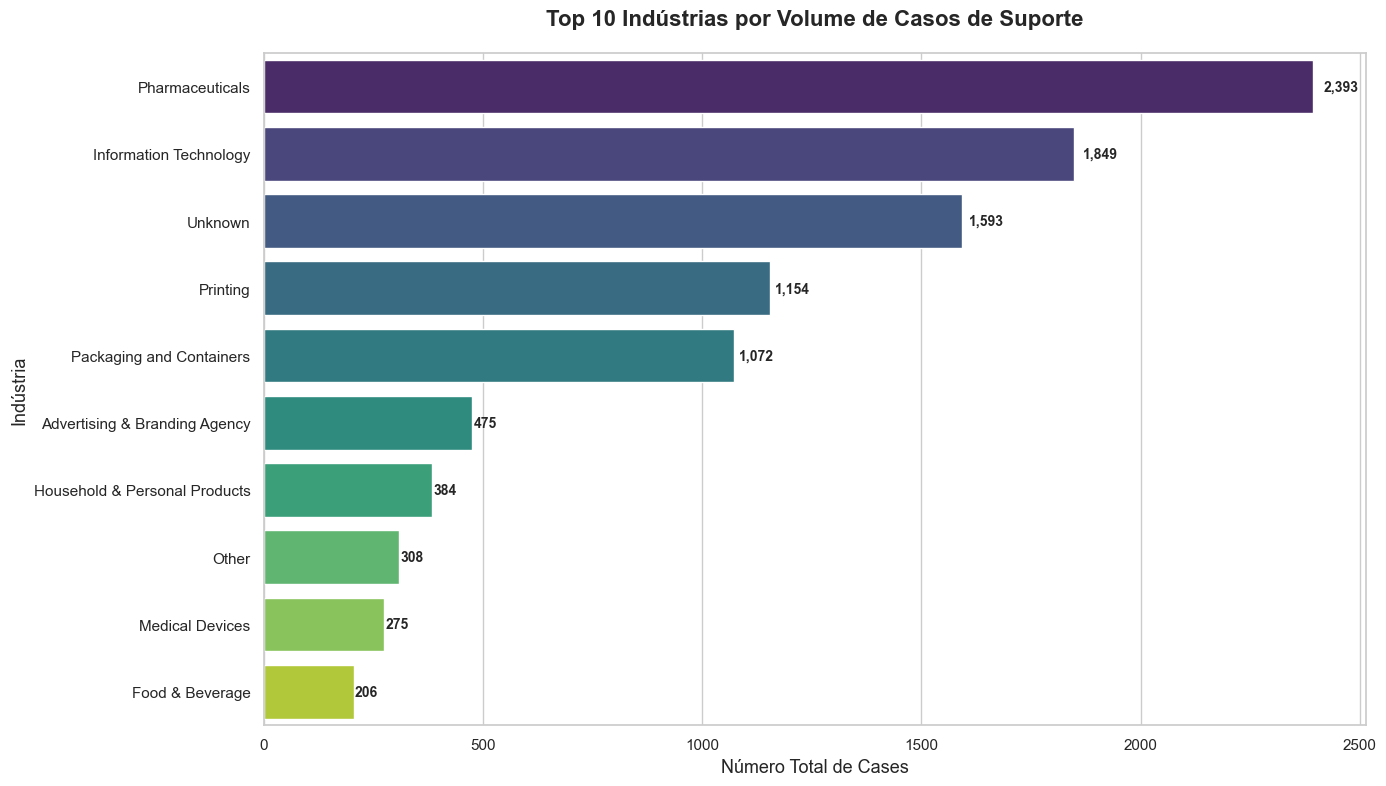

In [31]:
# Célula 12: Gráfico de Barras - Top Indústrias
import os

# 1. Garante que o diretório de saída existe (evita erro de FileNotFoundError)
os.makedirs('../output/figures', exist_ok=True)

plt.figure(figsize=(14, 8))

# Garante que pegamos apenas o top 10 ordenado
top_industries = df_industry_metrics.sort_values('total_cases', ascending=False).head(10)

# 2. Plotagem corrigida (adicionado hue e legend=False para evitar warnings recentes do Seaborn)
ax = sns.barplot(
    data=top_industries, 
    y='industry', 
    x='total_cases', 
    hue='industry',  # Boas práticas do Seaborn novo
    palette='viridis',
    legend=False
)

plt.title('Top 10 Indústrias por Volume de Casos de Suporte', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Número Total de Cases', fontsize=13)
plt.ylabel('Indústria', fontsize=13)

# 3. Adicionar valores nas barras (Ajuste de posição dinâmica)
for i, v in enumerate(top_industries['total_cases']):
    # O offset (+ v * 0.01) coloca o texto um pouco à frente da barra proporcionalmente
    ax.text(v + (v * 0.01), i, f'{v:,.0f}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()

# Salva a figura
plt.savefig('../output/figures/01_volume_por_industria.png', dpi=300, bbox_inches='tight')
print("✅ Gráfico salvo em: ../output/figures/01_volume_por_industria.png")

plt.show()

Visualização 2: Tempo de Resolução

✅ Gráfico salvo em: ../output/figures/02_tempo_resolucao.png


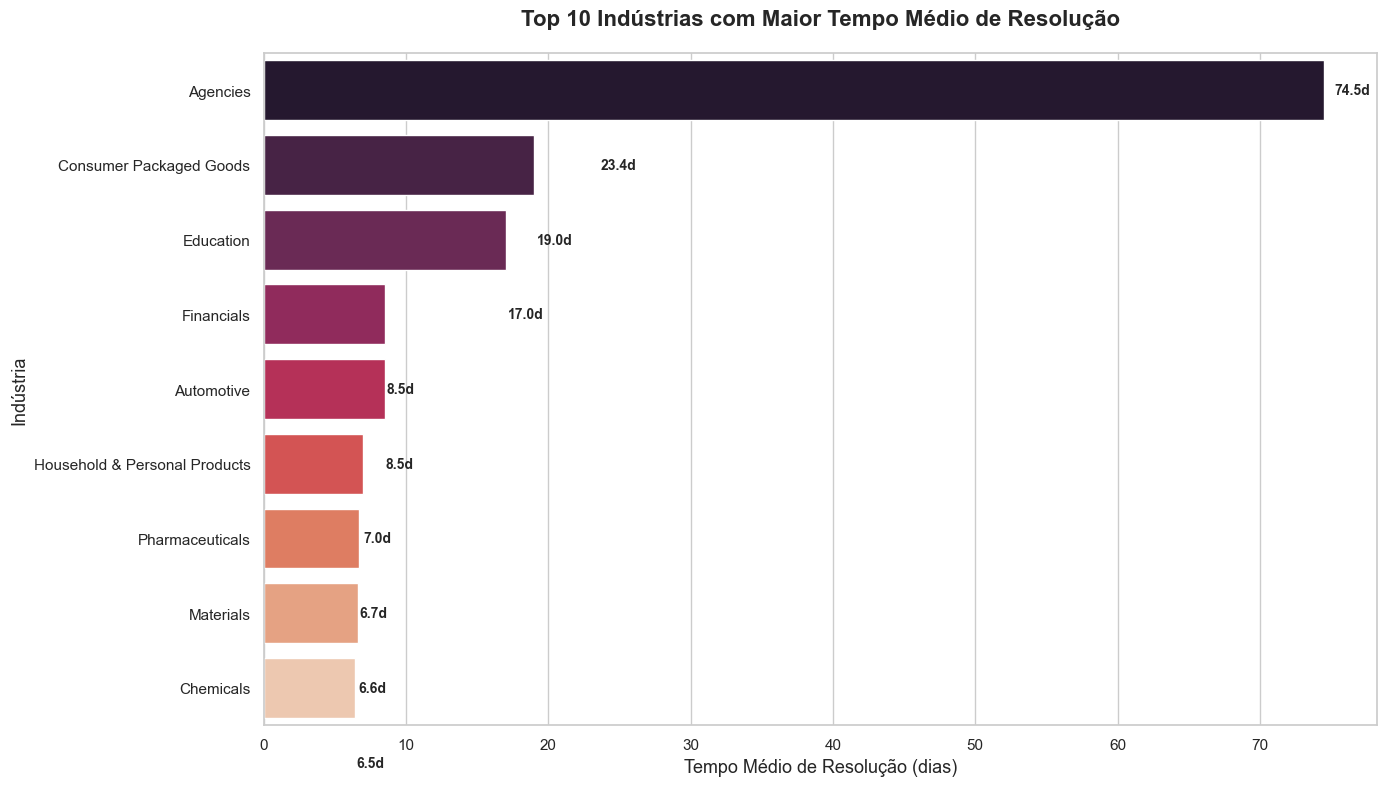

In [ ]:
# Célula 13: Gráfico de Barras Horizontal - Tempo de Resolução
plt.figure(figsize=(14, 8))

# Seleciona as 10 indústrias com maior tempo médio
top_resolution = df_industry_metrics.nlargest(10, 'avg_resolution_days')

# Plotagem ajustada (hue + legend=False para conformidade com Seaborn v0.13+)
ax = sns.barplot(
    data=top_resolution, 
    y='industry', 
    x='avg_resolution_days', 
    hue='industry', 
    palette='rocket', 
    legend=False
)

plt.title('Top 10 Indústrias com Maior Tempo Médio de Resolução', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Tempo Médio de Resolução (dias)', fontsize=13)
plt.ylabel('Indústria', fontsize=13)

# Adicionar valores nas barras com offset proporcional
for i, v in enumerate(top_resolution['avg_resolution_days']):
    # (v * 0.01) garante que o texto fique afastado proporcionalmente ao tamanho da barra
    ax.text(v + (v * 0.01), i, f'{v:.1f}d', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('../output/figures/02_tempo_resolucao.png', dpi=300, bbox_inches='tight')
print("✅ Gráfico salvo em: ../output/figures/02_tempo_resolucao.png")

plt.show()

Visualização 3: Distribuição de Status

✅ Gráfico salvo em: ../output/figures/03_distribuicao_status.png


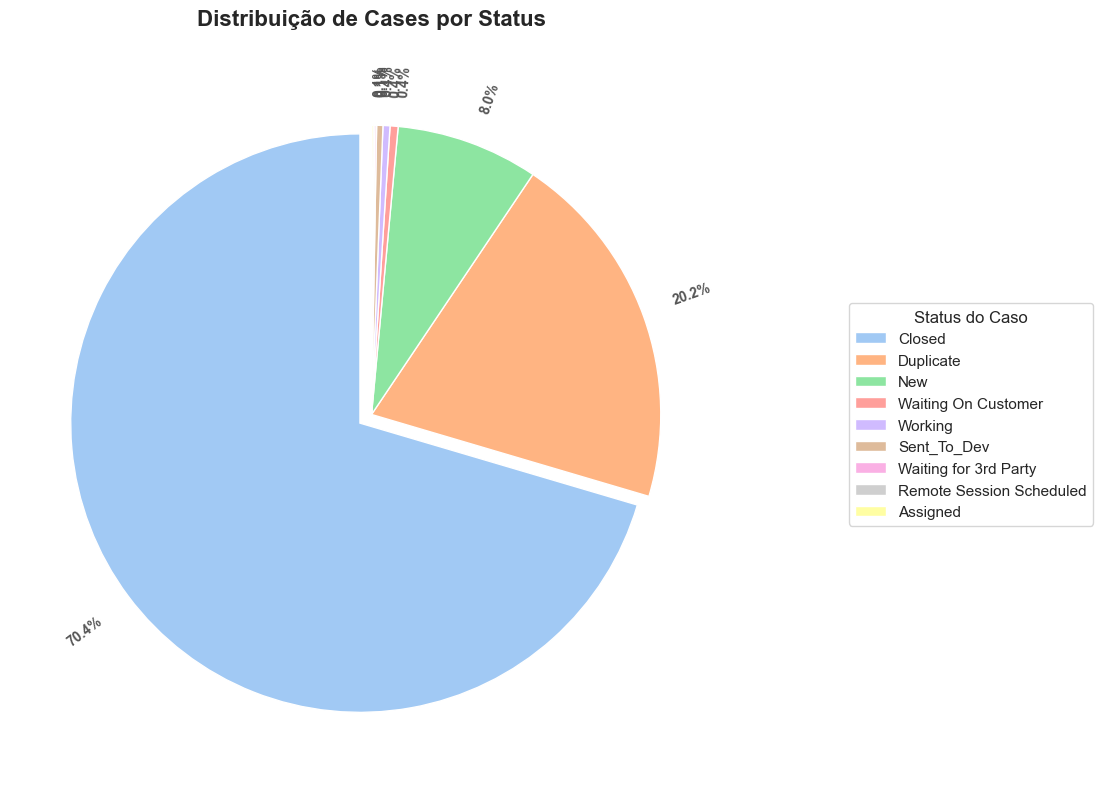

In [38]:
# Célula 14: Gráfico de Pizza - Status dos Cases

plt.figure(figsize=(12, 8)) 

# Definição de cores
colors = sns.color_palette('pastel', len(df_status_metrics))
explode = [0.05 if i == 0 else 0 for i in range(len(df_status_metrics))]

# Cálculo manual das porcentagens para usar como labels rotacionados
# Isso permite usar o parâmetro 'rotatelabels' que só funciona em labels, não em autopct
total = df_status_metrics['total_cases'].sum()
percent_labels = [f'{v/total*100:.1f}%' for v in df_status_metrics['total_cases']]

# 1. Plotagem
patches, texts = plt.pie(
    df_status_metrics['total_cases'], 
    labels=percent_labels,      # Usamos as % como labels para poder rodar
    labeldistance=1.1,          # Distância: 1.1 deixa fora da pizza (1.0 é a borda)
    rotatelabels=True,          # <--- MÁGICA: Deixa o texto perpendicular (raio)
    colors=colors,
    explode=explode,
    startangle=90
)

# 2. Formatação dos textos das porcentagens (que agora são labels)
for text in texts:
    text.set_fontsize(10)
    text.set_fontweight('bold')
    text.set_color('#555555') # Cinza escuro para contraste suave

# 3. Legenda Lateral (Mapeando as cores às categorias originais)
plt.legend(
    patches, # Usamos os objetos gráficos para garantir a cor certa
    df_status_metrics['status'],
    title="Status do Caso",
    loc="center left",
    bbox_to_anchor=(1.15, 0, 0.5, 1) # Afastei um pouco mais (1.15) para dar espaço aos labels
)

plt.title('Distribuição de Cases por Status', 
          fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('../output/figures/03_distribuicao_status.png', dpi=300, bbox_inches='tight')
print("✅ Gráfico salvo em: ../output/figures/03_distribuicao_status.png")

plt.show()